# Camera calibration

In [1]:
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [54]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
# the origin corner is (0,0,0) the final corner is (8,5,0) 
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

In [55]:
len(images)

20

In [56]:
%%time
# Step through the list and search for chessboard corners
dim = (9,6)
original_img = []
corner_img = []
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, dim, None)

    # If found, add object points, image points
    if ret == True:
        original_img.append(img.copy())
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, dim, corners, ret)
        corner_img.append(img)
    else:
        print("cannot find the corner in", fname)

cannot find the corner in camera_cal/calibration5.jpg
cannot find the corner in camera_cal/calibration4.jpg
cannot find the corner in camera_cal/calibration1.jpg
CPU times: user 1.87 s, sys: 119 ms, total: 1.99 s
Wall time: 1.85 s


In [57]:
len(objpoints)

17

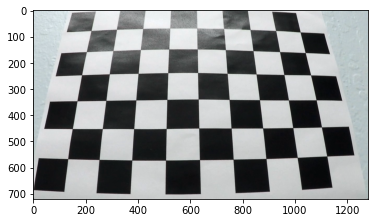

In [58]:
# display one of the image
_ = plt.imshow(original_img[2])

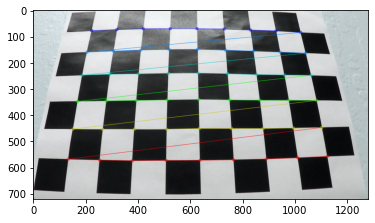

In [59]:
# display one of the image
_ = plt.imshow(corner_img[2])

In [71]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# Test undistortion on an image

In [72]:
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

In [73]:
dst = cv2.undistort(img, mtx, dist, None, mtx)

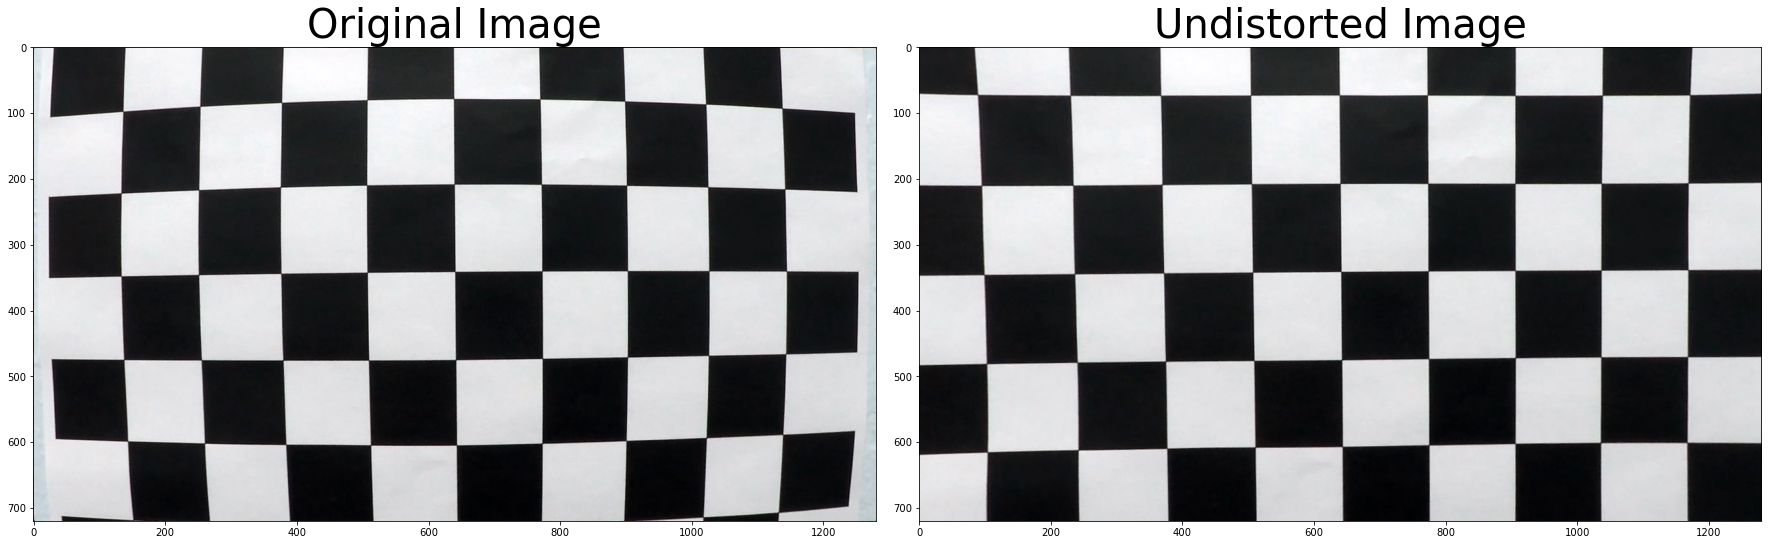

In [74]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [63]:
cv2.imwrite("output_images/undistorted_calibration1.jpg",dst)

True

In [70]:
# Save the camera calibration result 
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration.pickle", "wb" ) )

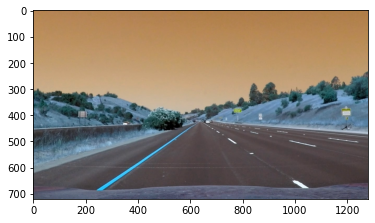

In [75]:
img = cv2.imread('test_images/straight_lines1.jpg')
img_size = (img.shape[1], img.shape[0])
plt.imshow(img)

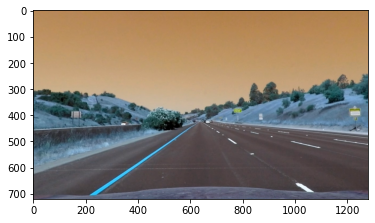

In [65]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
_ = plt.imshow(dst)